In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,
    classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


In [2]:
df = pd.read_csv('lung_cancer_final.csv', encoding='utf-8')
df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 187 non-null    object
 1   AGE                    187 non-null    int64 
 2   SMOKING                187 non-null    int64 
 3   YELLOW_FINGERS         187 non-null    int64 
 4   ANXIETY                187 non-null    int64 
 5   PEER_PRESSURE          187 non-null    int64 
 6   CHRONIC DISEASE        187 non-null    int64 
 7   FATIGUE                187 non-null    int64 
 8   ALLERGY                187 non-null    int64 
 9   WHEEZING               187 non-null    int64 
 10  ALCOHOL CONSUMING      187 non-null    int64 
 11  COUGHING               187 non-null    int64 
 12  SHORTNESS OF BREATH    187 non-null    int64 
 13  SWALLOWING DIFFICULTY  187 non-null    int64 
 14  CHEST PAIN             187 non-null    int64 
 15  LUNG_CANCER            

In [4]:
df.drop_duplicates(inplace=True)
#xóa các hàng lặp lại

In [5]:
df.dropna(inplace=True)
#xóa các hàng có chứa giá trị nan

In [6]:
data1 = df.copy()
#Sao chép dữ liệu gốc

In [7]:
le = LabelEncoder()
# chuyển đổi dữ liệu phân loại thành số nguyên một cách đơn giản 

In [8]:
le.fit(data1['GENDER'])
data1['GENDER'] = le.transform(data1['GENDER'])
# le.fit(): Học tất cả các giá trị phân loại duy nhất trong cột HeartDisease.
#le.transform(): Chuyển đổi các giá trị trong cột HeartDisease thành các số nguyên.


In [9]:
le.fit(data1['LUNG_CANCER'])
data1['LUNG_CANCER'] = le.transform(data1['LUNG_CANCER'])
# le.fit(): Học tất cả các giá trị phân loại duy nhất trong cột HeartDisease.
#le.transform(): Chuyển đổi các giá trị trong cột HeartDisease thành các số nguyên.

In [10]:
data1.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [11]:
X = data1.loc[:,'GENDER':'CHEST PAIN']
y = data1.loc[:,'LUNG_CANCER']
# Split by percent and store data in lists
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100,oob_score=True, random_state=25)
rf.fit(X_train, y_train) # Train the Random Forest model

RandomForestClassifier(oob_score=True, random_state=25)

In [12]:
# Make predictions and evaluate
y_pred = rf.predict(X_test) # Predicts the class labels for the test dataset X_test.
y_prob = rf.predict_proba(X_test)[:, 1]  # Predicts the probability of the positive class
                                        # (class 1) for each sample in X_test

In [13]:
acc = accuracy_score(y_test, y_pred)  # Proportion of correct predictions out of total predictions.
print("Accuracy:", acc)

Accuracy: 0.9166666666666666


In [14]:
prec = precision_score(y_test, y_pred) # Proportion of correctly predicted positive samples out of all predicted positives.
print("Precision:", prec)

Precision: 0.9130434782608695


In [15]:
rec = recall_score(y_test, y_pred) # Proportion of actual positive samples correctly identified as positive.
print("Recall:", rec)

Recall: 0.9545454545454546


In [16]:
f1 = f1_score(y_test, y_pred) # Harmonic mean of precision and recall.
print("F1 Score:", f1)

F1 Score: 0.9333333333333333


In [17]:
roc_auc = roc_auc_score(y_test, y_prob) # Measures the model's ability to distinguish between classes
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8831168831168832


In [18]:
cm = confusion_matrix(y_test, y_pred) # Provides a matrix summarizing the prediction results:
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[12  2]
 [ 1 21]]


In [19]:
report = classification_report(y_test, y_pred) # Generates a detailed text summary of precision, recall, F1-score, and support for each class.
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.91      0.95      0.93        22

    accuracy                           0.92        36
   macro avg       0.92      0.91      0.91        36
weighted avg       0.92      0.92      0.92        36



In [20]:
feature_names = ['GENDER','AGE','SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE',
                 'FATIGUE','ALLERGY','WHEEZING','ALCOHOL CONSUMING','COUGHING','SHORTNESS OF BREATH',
                 'SWALLOWING DIFFICULTY','CHEST PAIN','LUNG_CANCER']
target_names = ['NO', 'YES']

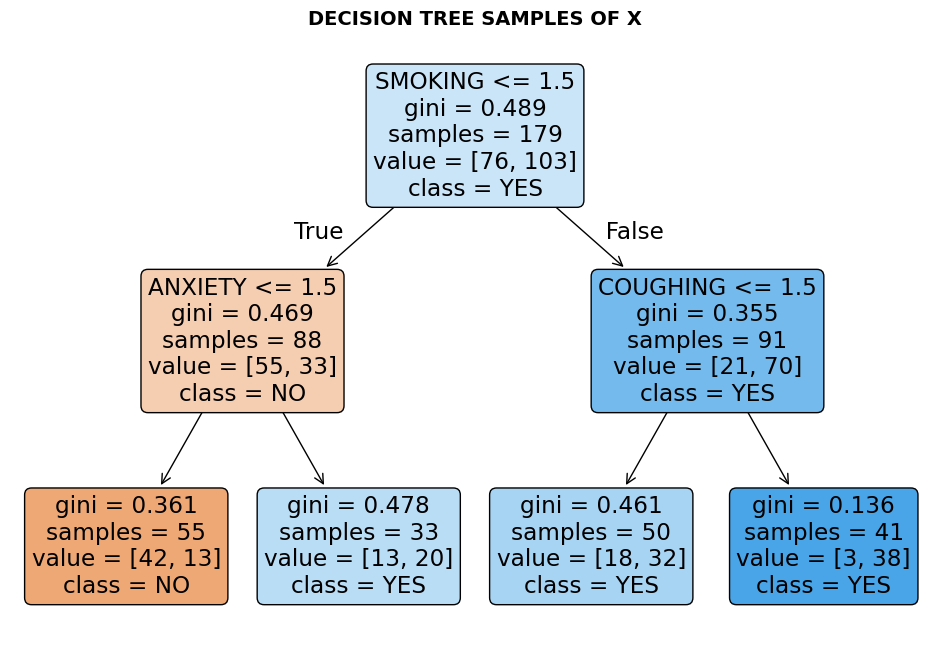

In [21]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, rounded=True, feature_names=feature_names, class_names=target_names)
plt.title('DECISION TREE SAMPLES OF X', fontsize=14, fontweight='bold')
plt.show()

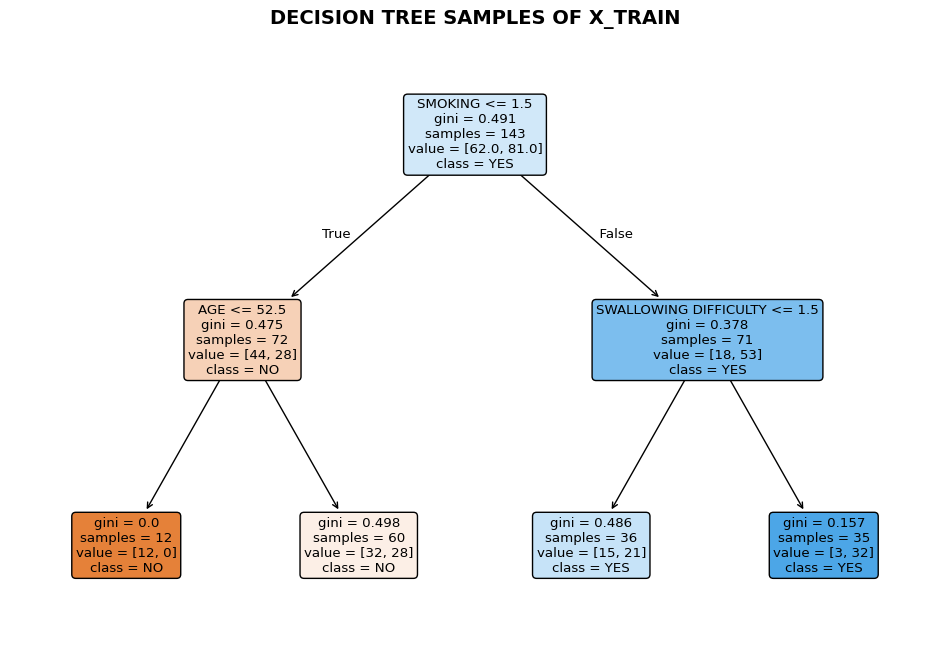

In [22]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, rounded=True, feature_names=feature_names, class_names=target_names)
plt.title('DECISION TREE SAMPLES OF X_TRAIN', fontsize=14, fontweight='bold')
plt.show()

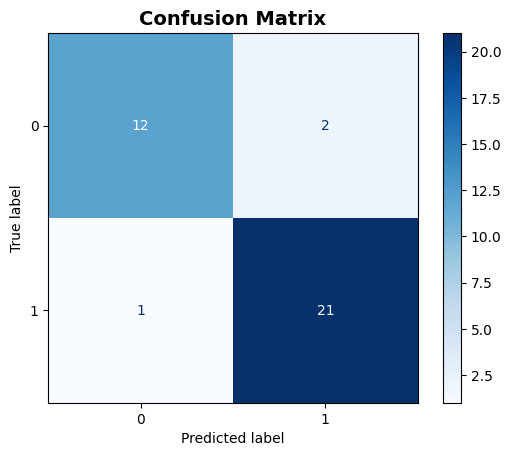

In [23]:
# Assuming `y_test` are true labels and `y_pred` are predictions
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix", fontsize=14, fontweight='bold')
plt.show()


c:\Users\manht\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


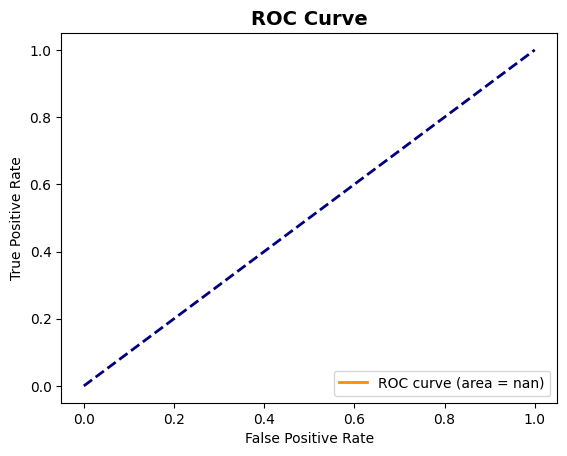

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binary or One-vs-Rest ROC
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1], pos_label="YES")
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.show()


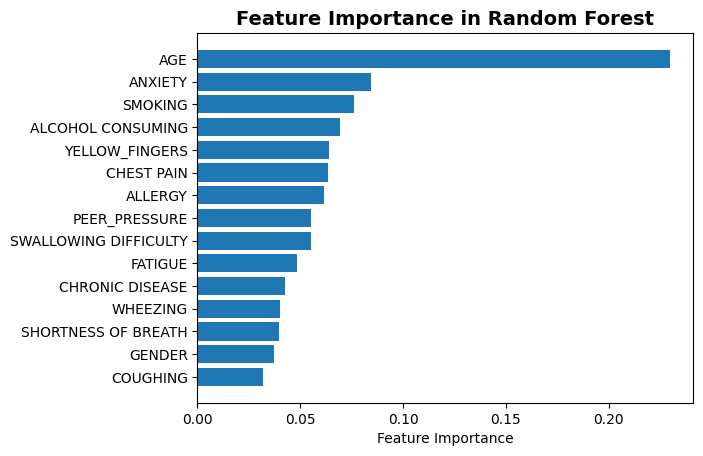

In [25]:

feature_importances = rf.feature_importances_
feature_names = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
                 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY',
                 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
sorted_idx = feature_importances.argsort()

plt.barh(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(feature_importances)), pd.Series(feature_names).iloc[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest', fontsize=14, fontweight='bold')
plt.show()


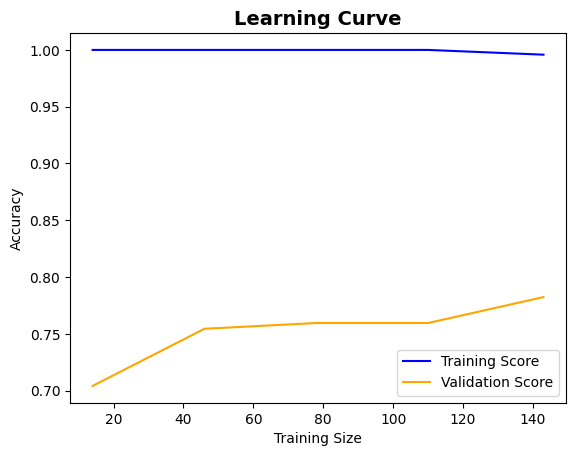

In [26]:

train_sizes, train_scores, test_scores = learning_curve(rf, X, y, cv=5, scoring='accuracy')
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.show()


c:\Users\manht\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_ranking.py:1027: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


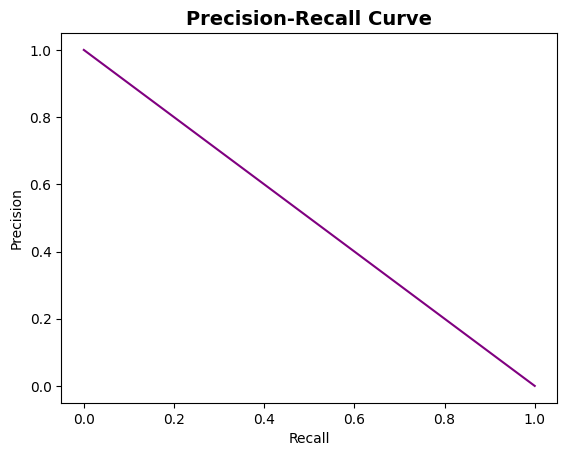

In [27]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1], pos_label="YES")
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.show()


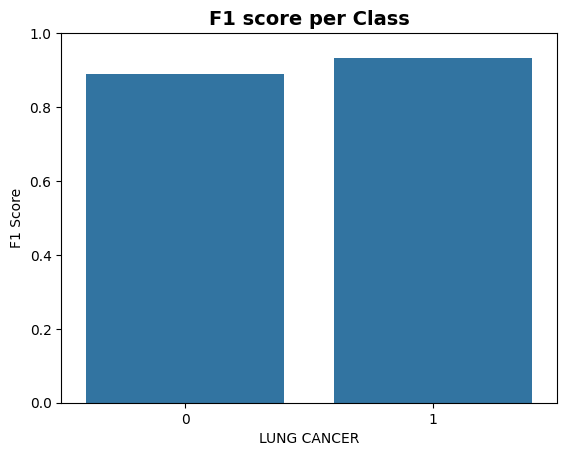

In [49]:
from sklearn.metrics import classification_report
import seaborn as sns

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

sns.barplot(x=df_report.index[:-3], y=df_report['f1-score'][:-3])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.ylabel('F1 Score')
plt.xlabel('LUNG CANCER')
plt.title('F1 score per Class', fontsize=14, fontweight='bold')
plt.show()


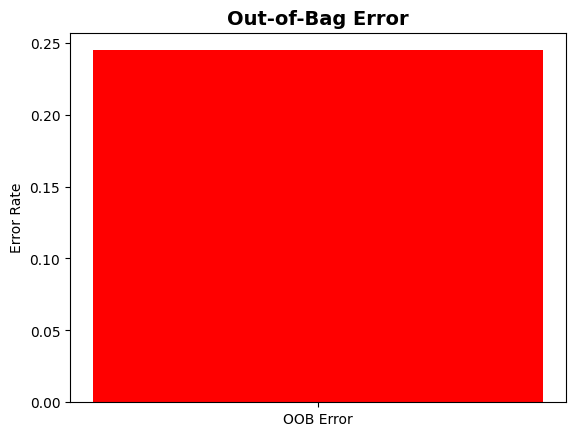

In [29]:
oob_error = 1 - rf.oob_score_

plt.bar(['OOB Error'], [oob_error], color='red')
plt.ylabel('Error Rate')
plt.title('Out-of-Bag Error', fontsize=14, fontweight='bold')
plt.show()


In [30]:
def rgb_to_heximal(r, g, b):
    return np.array([r, g, b]) / 255

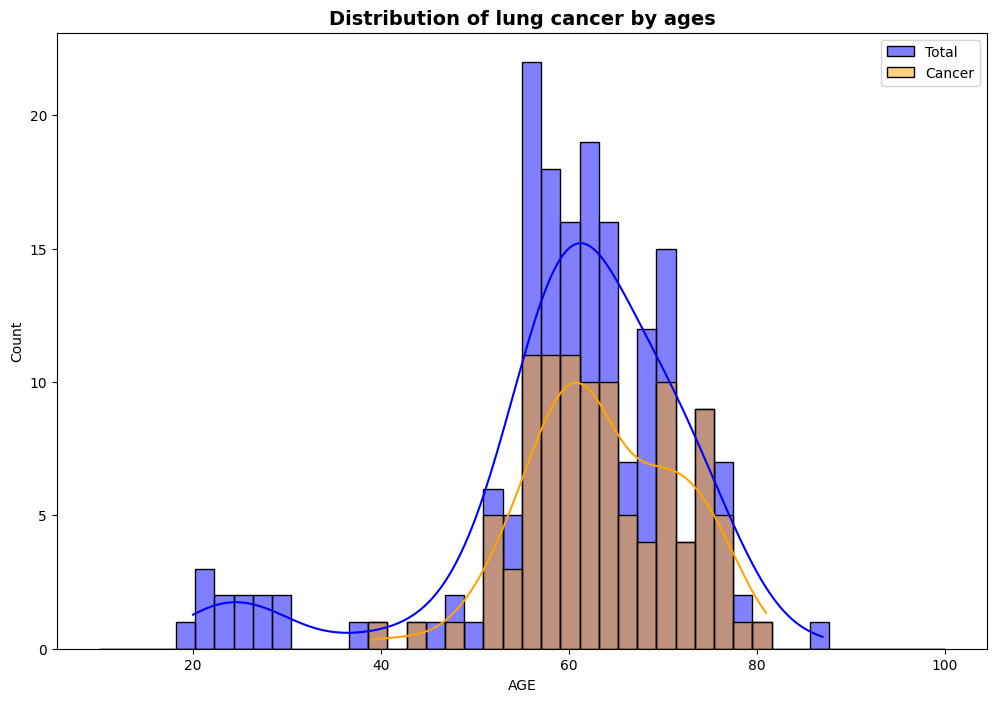

In [31]:
cancer_df = data1[data1['LUNG_CANCER']==1]
plt.figure(figsize=(12,8))
bins = np.linspace(10,100,45)
sns.histplot(data1['AGE'], bins=bins, kde=True, label='Total', color='blue')
sns.histplot(cancer_df['AGE'], bins=bins, kde=True, label='Cancer', color='orange')

plt.title('Distribution of lung cancer by ages', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

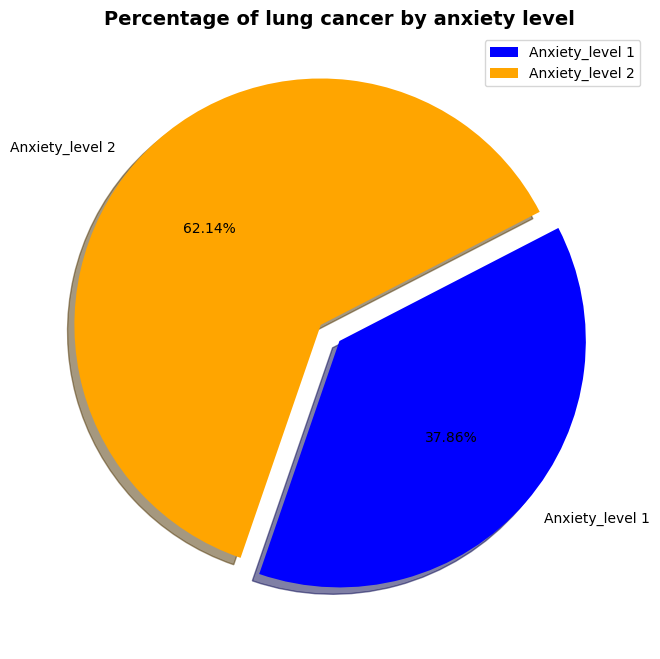

In [32]:
cur = data1[['ANXIETY', 'LUNG_CANCER']]
plt.figure(figsize=(12,8))
view = cur.groupby('ANXIETY')['LUNG_CANCER'].value_counts()

plt.pie([view[1,1], view[2,1]], colors=['blue', 'orange'], labels=['Anxiety_level 1','Anxiety_level 2'],
        autopct='%1.2f%%', explode=[0,0.1], shadow=True,
        startangle=random.randint(1,360))
plt.legend()

plt.title('Percentage of lung cancer by anxiety level', fontsize=14, fontweight='bold')
plt.show()


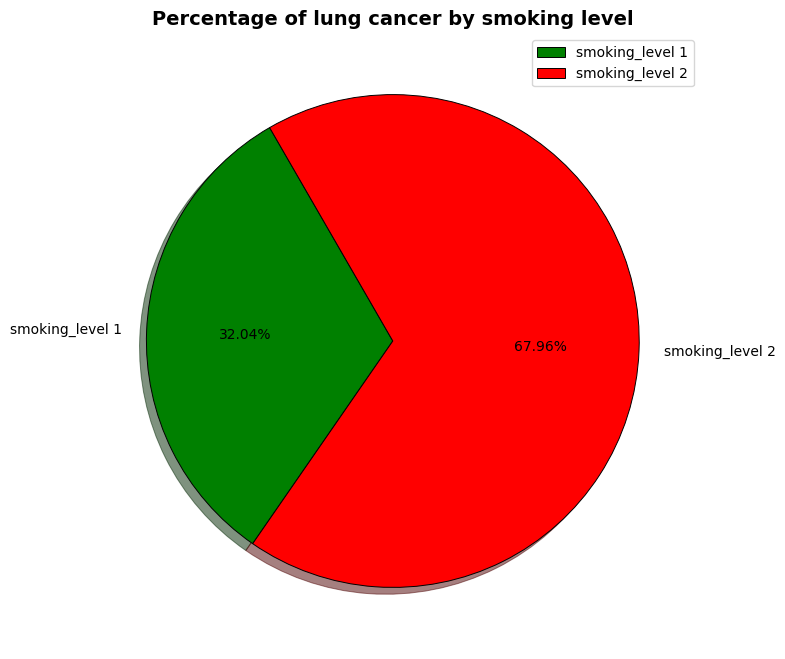

In [33]:
cur = data1[['SMOKING', 'LUNG_CANCER']]
plt.figure(figsize=(12,8))
view = cur.groupby('SMOKING')['LUNG_CANCER'].value_counts()

plt.pie([view[1,1], view[2,1]], colors=['green', 'red'], labels=['smoking_level 1','smoking_level 2'],
        autopct='%1.2f%%', shadow=True, 
        wedgeprops={'edgecolor': 'black', 'linewidth': .7},
        startangle=random.randint(1,360))
plt.legend()

plt.title('Percentage of lung cancer by smoking level', fontsize=14, fontweight='bold')
plt.show()

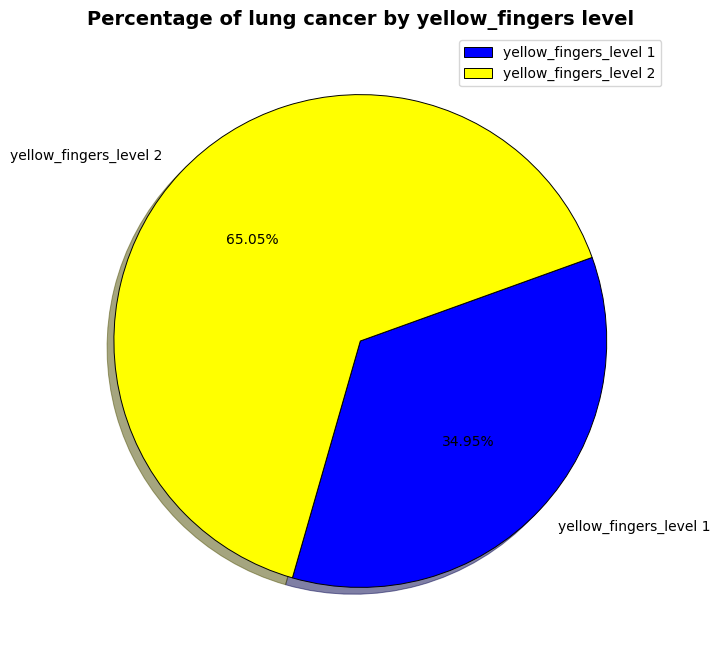

In [34]:
cur = data1[['YELLOW_FINGERS', 'LUNG_CANCER']]
plt.figure(figsize=(12,8))
view = cur.groupby('YELLOW_FINGERS')['LUNG_CANCER'].value_counts()

plt.pie([view[1,1], view[2,1]], colors=['blue', 'yellow'], labels=['yellow_fingers_level 1','yellow_fingers_level 2'],
        autopct='%1.2f%%', explode=[0,0], shadow=True, 
        wedgeprops={'edgecolor': 'black', 'linewidth': .7},
        startangle=random.randint(1,360))
plt.legend()

plt.title('Percentage of lung cancer by yellow_fingers level', fontsize=14, fontweight='bold')
plt.show()

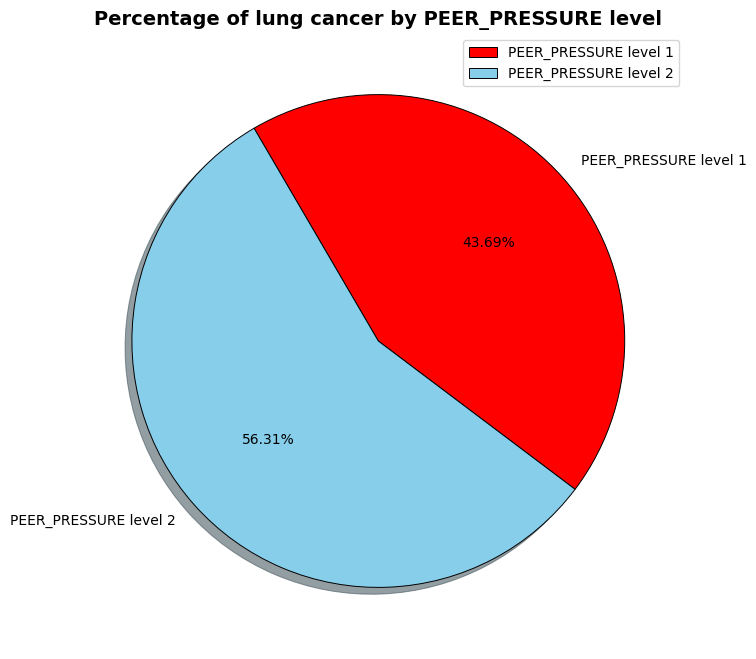

In [35]:

cur = data1[['PEER_PRESSURE', 'LUNG_CANCER']]
plt.figure(figsize=(12,8))
view = cur.groupby('PEER_PRESSURE')['LUNG_CANCER'].value_counts()

plt.pie([view[1,1], view[2,1]], colors=['red', 'skyblue'], labels=['PEER_PRESSURE level 1','PEER_PRESSURE level 2'],
        autopct='%1.2f%%', explode=[0,0], shadow=True, 
        wedgeprops={'edgecolor': 'black', 'linewidth': .7},
        startangle=random.randint(1,360))
plt.legend()

plt.title('Percentage of lung cancer by PEER_PRESSURE level', fontsize=14, fontweight='bold')
plt.show()

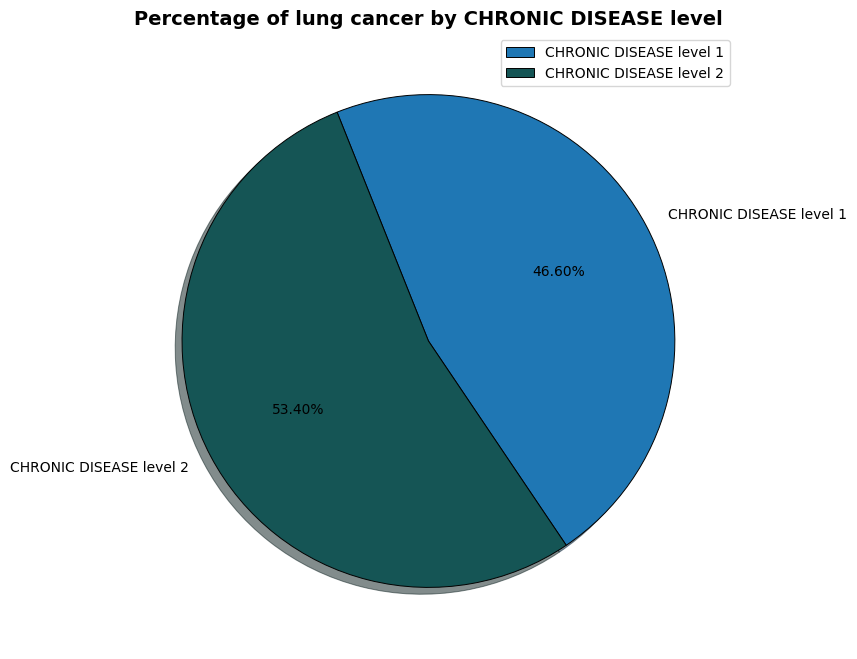

In [36]:

cur = data1[['CHRONIC DISEASE', 'LUNG_CANCER']]
plt.figure(figsize=(12,8))
view = cur.groupby('CHRONIC DISEASE')['LUNG_CANCER'].value_counts()

plt.pie([view[1,1], view[2,1]], colors=['#1f77b4', '#155555'], labels=['CHRONIC DISEASE level 1','CHRONIC DISEASE level 2'],
        autopct='%1.2f%%', explode=[0,0], shadow=True, 
        wedgeprops={'edgecolor': 'black', 'linewidth': .7},
        startangle=random.randint(1,360))
plt.legend()

plt.title('Percentage of lung cancer by CHRONIC DISEASE level', fontsize=14, fontweight='bold')
plt.show()

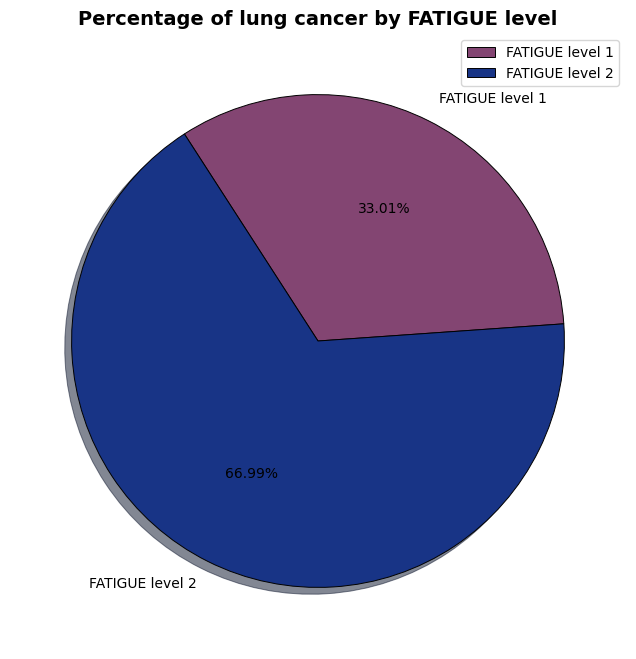

In [37]:
# FATIGUE
cur = data1[['FATIGUE', 'LUNG_CANCER']]
plt.figure(figsize=(12,8))
view = cur.groupby('FATIGUE')['LUNG_CANCER'].value_counts()

plt.pie([view[1,1], view[2,1]], colors=['#834572', '#183486'], labels=['FATIGUE level 1','FATIGUE level 2'],
        autopct='%1.2f%%', explode=[0,0], shadow=True, 
        wedgeprops={'edgecolor': 'black', 'linewidth': .7},
        startangle=random.randint(1,360))
plt.legend()

plt.title('Percentage of lung cancer by FATIGUE level', fontsize=14, fontweight='bold')
plt.show()

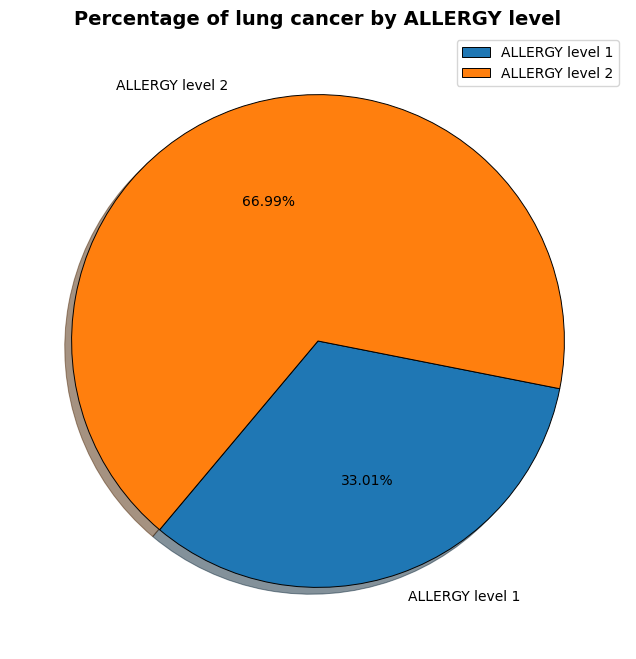

In [38]:
# ALLERGY
cur = data1[['ALLERGY', 'LUNG_CANCER']]
plt.figure(figsize=(12,8))
view = cur.groupby('ALLERGY')['LUNG_CANCER'].value_counts()

plt.pie([view[1,1], view[2,1]], colors=['#1f77b4', '#ff7f0e'], labels=['ALLERGY level 1','ALLERGY level 2'],
        autopct='%1.2f%%', explode=[0,0], shadow=True, 
        wedgeprops={'edgecolor': 'black', 'linewidth': .7},
        startangle=random.randint(1,360))
plt.legend()

plt.title('Percentage of lung cancer by ALLERGY level', fontsize=14, fontweight='bold')
plt.show()

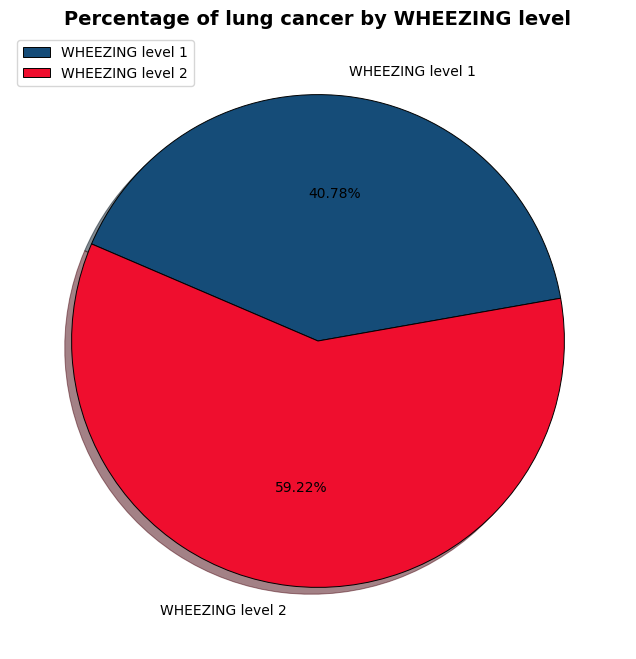

In [39]:
# WHEEZING
cur = data1[['WHEEZING', 'LUNG_CANCER']]
plt.figure(figsize=(12,8))
view = cur.groupby('WHEEZING')['LUNG_CANCER'].value_counts()

colors = ['#'+''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(2)]
plt.pie([view[1,1], view[2,1]], colors=colors, labels=['WHEEZING level 1','WHEEZING level 2'],
        autopct='%1.2f%%', explode=[0,0], shadow=True, 
        wedgeprops={'edgecolor': 'black', 'linewidth': .7},
        startangle=random.randint(1,360))
plt.legend()
plt.title('Percentage of lung cancer by WHEEZING level', fontsize=14, fontweight='bold')
plt.show()

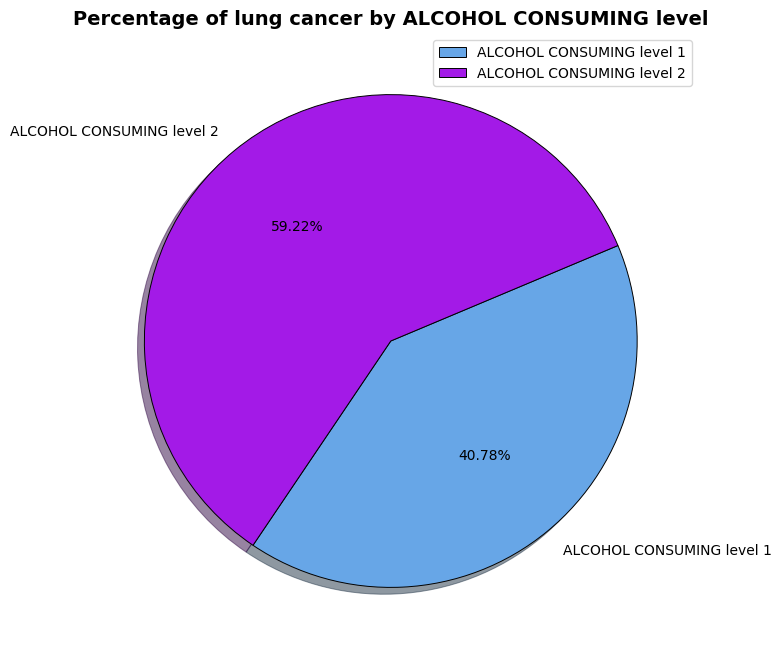

In [40]:
# ALCOHOL CONSUMING
cur = data1[['ALCOHOL CONSUMING', 'LUNG_CANCER']]
plt.figure(figsize=(12,8))
view = cur.groupby('ALCOHOL CONSUMING')['LUNG_CANCER'].value_counts()

colors = ['#'+''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(2)]
plt.pie([view[1,1], view[2,1]], colors=colors, labels=['ALCOHOL CONSUMING level 1','ALCOHOL CONSUMING level 2'],
        autopct='%1.2f%%', explode=[0,0], shadow=True, 
        wedgeprops={'edgecolor': 'black', 'linewidth': .7},
        startangle=random.randint(1,360))
plt.legend()
plt.title('Percentage of lung cancer by ALCOHOL CONSUMING level', fontsize=14, fontweight='bold')
plt.show()

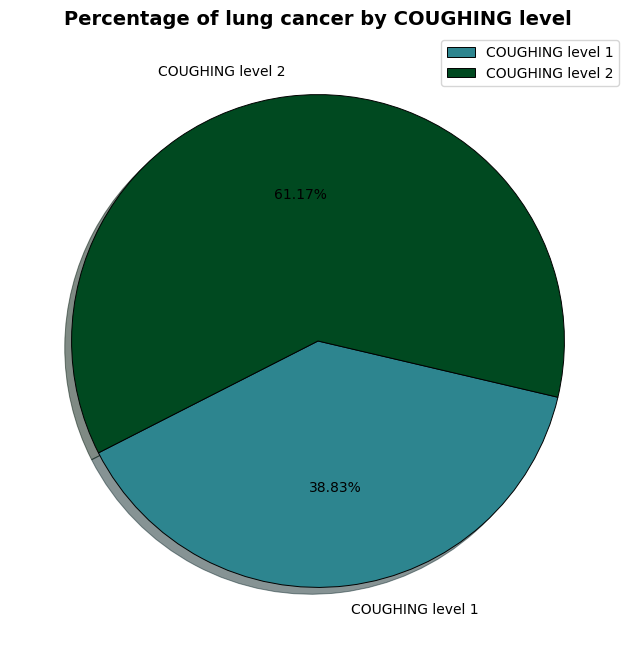

In [41]:
# COUGHING
cur = data1[['COUGHING', 'LUNG_CANCER']]
plt.figure(figsize=(12,8))
view = cur.groupby('COUGHING')['LUNG_CANCER'].value_counts()

colors = ['#'+''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(2)]
plt.pie([view[1,1], view[2,1]], colors=colors, labels=['COUGHING level 1','COUGHING level 2'],
        autopct='%1.2f%%', explode=[0,0], shadow=True, 
        wedgeprops={'edgecolor': 'black', 'linewidth': .7},
        startangle=random.randint(1,360))
plt.legend()
plt.title('Percentage of lung cancer by COUGHING level', fontsize=14, fontweight='bold')
plt.show()

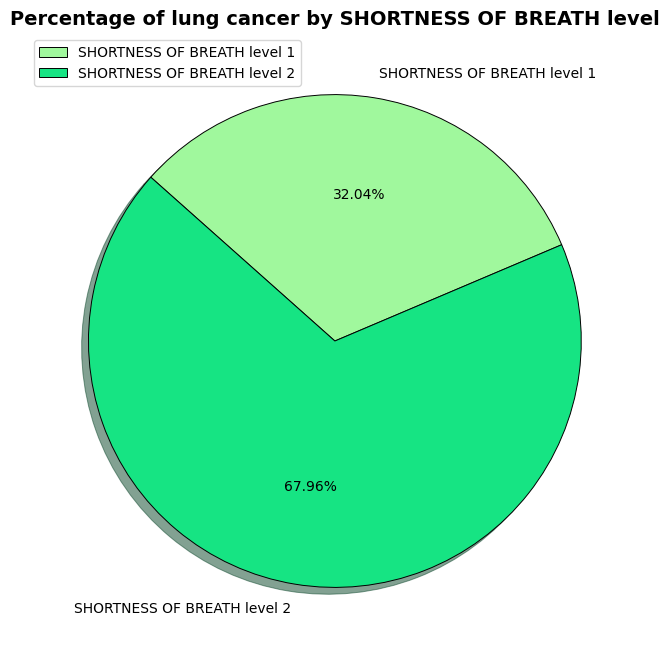

In [42]:
# SHORTNESS OF BREATH
cur = data1[['SHORTNESS OF BREATH', 'LUNG_CANCER']]
plt.figure(figsize=(12,8))
view = cur.groupby('SHORTNESS OF BREATH')['LUNG_CANCER'].value_counts()

colors = ['#'+''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(2)]
plt.pie([view[1,1], view[2,1]], colors=colors, labels=['SHORTNESS OF BREATH level 1','SHORTNESS OF BREATH level 2'],
        autopct='%1.2f%%', explode=[0,0], shadow=True, 
        wedgeprops={'edgecolor': 'black', 'linewidth': .7},
        startangle=random.randint(1,360))
plt.legend()
plt.title('Percentage of lung cancer by SHORTNESS OF BREATH level', fontsize=14, fontweight='bold')
plt.show()

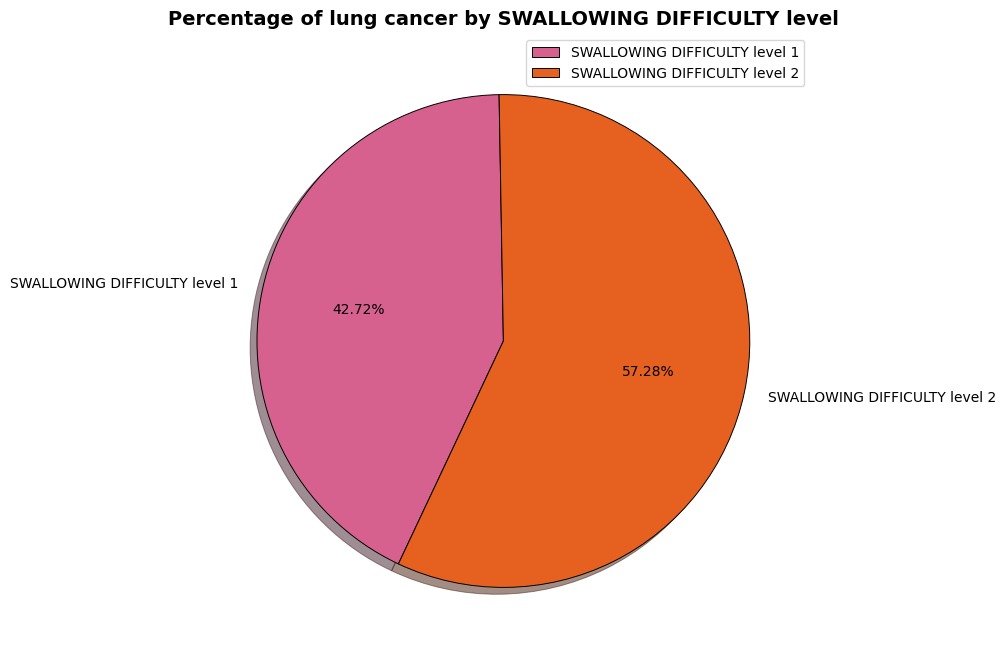

In [43]:
# SWALLOWING DIFFICULTY
cur = data1[['SWALLOWING DIFFICULTY', 'LUNG_CANCER']]
plt.figure(figsize=(12,8))
view = cur.groupby('SWALLOWING DIFFICULTY')['LUNG_CANCER'].value_counts()

colors = ['#'+''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(2)]
plt.pie([view[1,1], view[2,1]], colors=colors, labels=['SWALLOWING DIFFICULTY level 1','SWALLOWING DIFFICULTY level 2'],
        autopct='%1.2f%%', explode=[0,0], shadow=True, 
        wedgeprops={'edgecolor': 'black', 'linewidth': .7},
        startangle=random.randint(1,360))
plt.legend()
plt.title('Percentage of lung cancer by SWALLOWING DIFFICULTY level', fontsize=14, fontweight='bold')
plt.show()

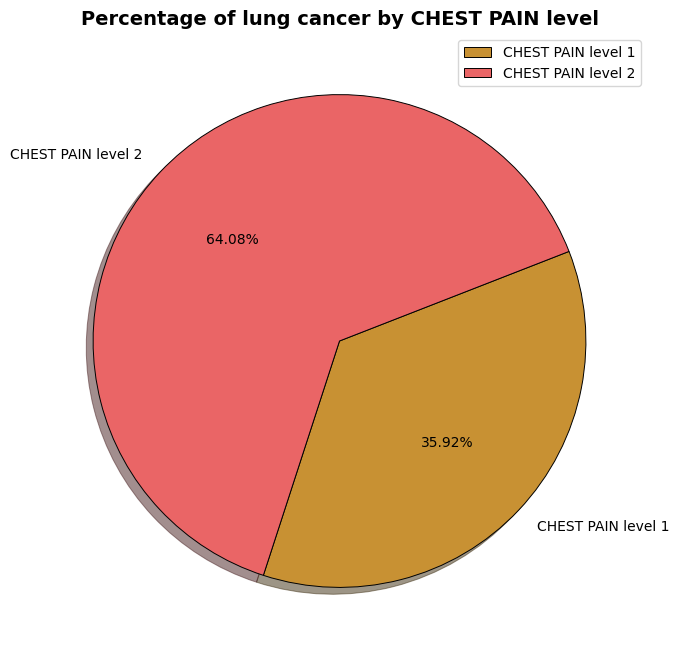

In [44]:
# CHEST PAIN
cur = data1[['CHEST PAIN', 'LUNG_CANCER']]
plt.figure(figsize=(12,8))
view = cur.groupby('CHEST PAIN')['LUNG_CANCER'].value_counts()

colors = ['#'+''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(2)]
plt.pie([view[1,1], view[2,1]], colors=colors, labels=['CHEST PAIN level 1','CHEST PAIN level 2'],
        autopct='%1.2f%%', explode=[0,0], shadow=True, 
        wedgeprops={'edgecolor': 'black', 'linewidth': .7},
        startangle=random.randint(1,360))
plt.legend()
plt.title('Percentage of lung cancer by CHEST PAIN level', fontsize=14, fontweight='bold')
plt.show()

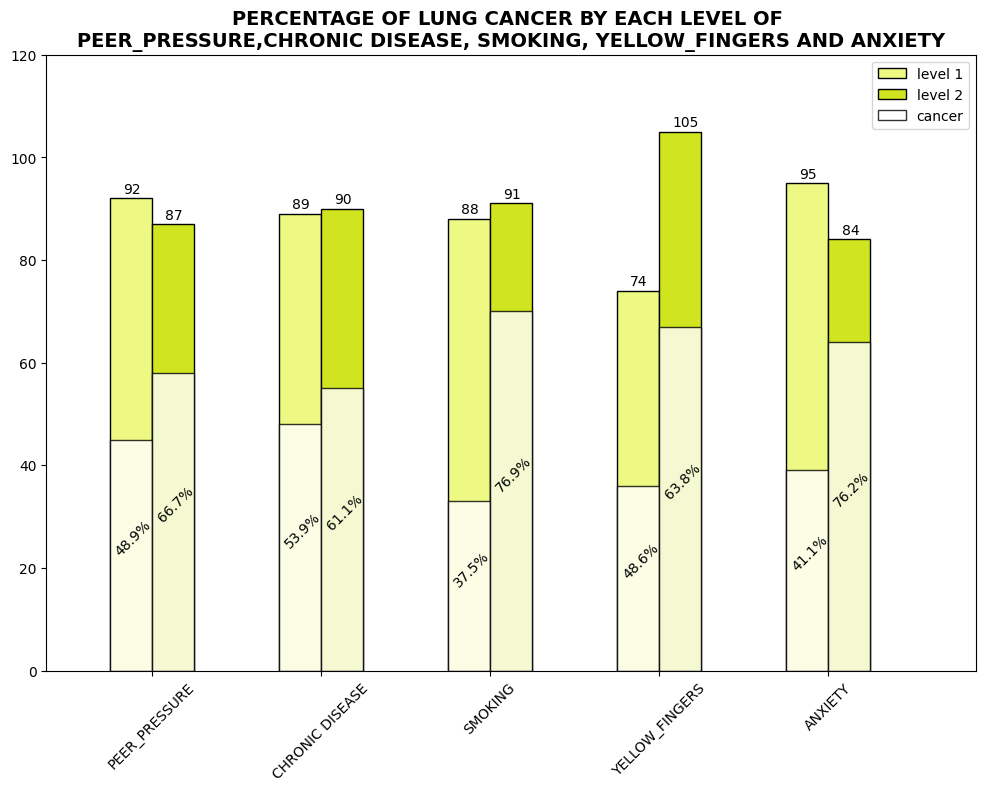

In [45]:
labels = ['PEER_PRESSURE', 'CHRONIC DISEASE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY']
width = 0.25
index = np.arange(len(labels))

total1 = data1[labels[0]].value_counts().sort_index()
cancer1 = data1[data1['LUNG_CANCER']==1].groupby(labels[0])['LUNG_CANCER'].count()
pct1 = cancer1/total1

total2 = data1[labels[1]].value_counts().sort_index()
cancer2 = data1[data1['LUNG_CANCER']==1].groupby(labels[1])['LUNG_CANCER'].count()
pct2 = cancer2/total2

total3 = data1[labels[2]].value_counts().sort_index()
cancer3 = data1[data1['LUNG_CANCER']==1].groupby(labels[2])['LUNG_CANCER'].count()
pct3 = cancer3/total3

total4 = data1[labels[3]].value_counts().sort_index()
cancer4 = data1[data1['LUNG_CANCER']==1].groupby(labels[3])['LUNG_CANCER'].count()
pct4 = cancer4/total4

total5 = data1[labels[4]].value_counts().sort_index()
cancer5 = data1[data1['LUNG_CANCER']==1].groupby(labels[4])['LUNG_CANCER'].count()
pct5 = cancer5/total5

kind1_tol = list(map(lambda x : x[1], [total1, total2, total3, total4, total5]))
kind1_can = list(map(lambda x : x[1], [cancer1, cancer2, cancer3, cancer4, cancer5]))
kind2_tol = list(map(lambda x : x[2], [total1, total2, total3, total4, total5]))
kind2_can = list(map(lambda x : x[2], [cancer1, cancer2, cancer3, cancer4, cancer5]))

plt.figure(figsize=(12,8))
tol1_bars = plt.bar(index, kind1_tol, width=width,color=rgb_to_heximal(237, 249, 130), label='level 1',
        edgecolor='black')
tol2_bars = plt.bar(index+width, kind2_tol, width=width,color=rgb_to_heximal(209, 228, 32), label='level 2',
        edgecolor='black')
can1_bars = plt.bar(index, kind1_can, width=width,color=rgb_to_heximal(255, 255, 255), label='cancer',edgecolor='black',
alpha=0.8)
can2_bars = plt.bar(index+width, kind2_can, width=width,color=rgb_to_heximal(255, 255, 255),edgecolor='black',
alpha=0.8)


for i, j, text in zip(index, list(can1_bars), map(lambda x: x[1], [pct1,pct2,pct3,pct4,pct5])):
    plt.text(i-width/2+0.02, j.get_height()/2, f'{round(text*100,1)}%', rotation=45)

for i, j, text in zip(index, list(can2_bars), map(lambda x: x[2], [pct1,pct2,pct3,pct4,pct5])):
    plt.text(i+width/2+0.02, j.get_height()/2, f'{round(text*100,1)}%', rotation=45)

for i, j in zip(index, tol1_bars):
    plt.text(i-width/2+0.08, j.get_height()+1, f'{j.get_height()}')

for i, j in zip(index, tol2_bars):
    plt.text(i+width/2+0.08, j.get_height()+1, f'{j.get_height()}')


plt.title('PERCENTAGE OF LUNG CANCER BY EACH LEVEL OF \n{},{}, {}, {} AND {}'.format(labels[0],
            labels[1],labels[2],labels[3],labels[4]),
          fontsize=14, fontweight='bold')
plt.xlim(-.5, index[-1] + 1)
plt.ylim(0,120)
plt.xticks(index+width/2, labels, rotation=45)
plt.legend()
plt.show()


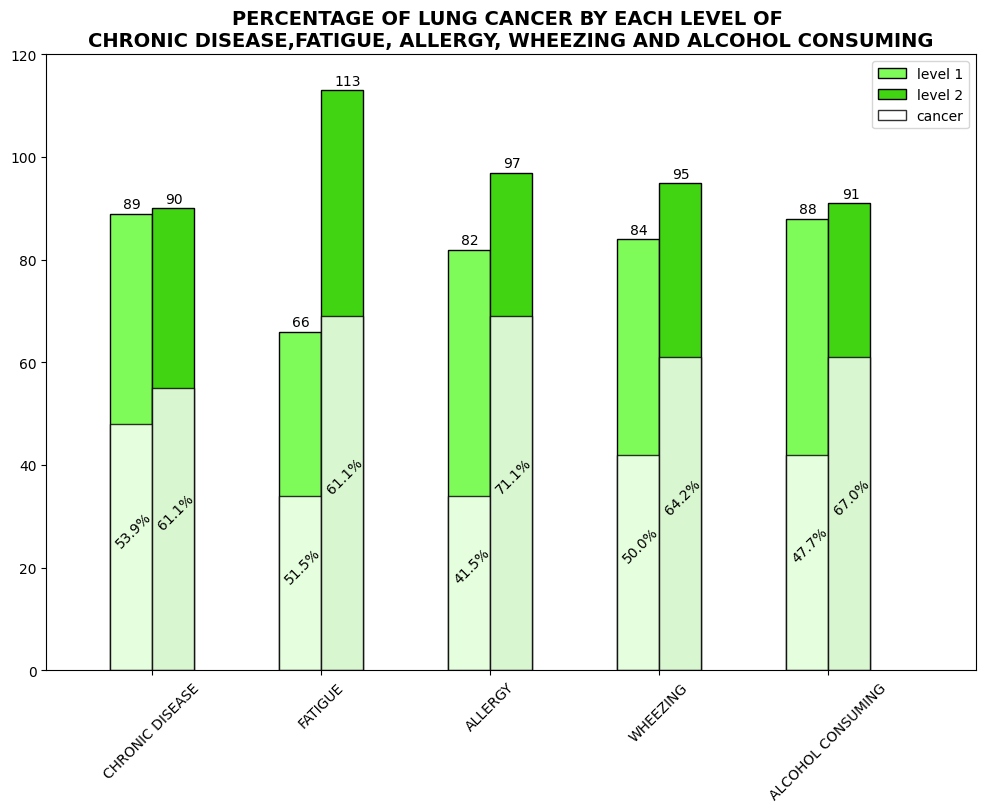

In [46]:
labels = ['CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING']
width = 0.25
index = np.arange(len(labels))

total1 = data1[labels[0]].value_counts().sort_index()
cancer1 = data1[data1['LUNG_CANCER']==1].groupby(labels[0])['LUNG_CANCER'].count()
pct1 = cancer1/total1

total2 = data1[labels[1]].value_counts().sort_index()
cancer2 = data1[data1['LUNG_CANCER']==1].groupby(labels[1])['LUNG_CANCER'].count()
pct2 = cancer2/total2

total3 = data1[labels[2]].value_counts().sort_index()
cancer3 = data1[data1['LUNG_CANCER']==1].groupby(labels[2])['LUNG_CANCER'].count()
pct3 = cancer3/total3

total4 = data1[labels[3]].value_counts().sort_index()
cancer4 = data1[data1['LUNG_CANCER']==1].groupby(labels[3])['LUNG_CANCER'].count()
pct4 = cancer4/total4

total5 = data1[labels[4]].value_counts().sort_index()
cancer5 = data1[data1['LUNG_CANCER']==1].groupby(labels[4])['LUNG_CANCER'].count()
pct5 = cancer5/total5

kind1_tol = list(map(lambda x : x[1], [total1, total2, total3, total4, total5]))
kind1_can = list(map(lambda x : x[1], [cancer1, cancer2, cancer3, cancer4, cancer5]))
kind2_tol = list(map(lambda x : x[2], [total1, total2, total3, total4, total5]))
kind2_can = list(map(lambda x : x[2], [cancer1, cancer2, cancer3, cancer4, cancer5]))

plt.figure(figsize=(12,8))
tol1_bars = plt.bar(index, kind1_tol, width=width,color=rgb_to_heximal(127, 251, 89), label='level 1',
        edgecolor='black')
tol2_bars = plt.bar(index+width, kind2_tol, width=width,color=rgb_to_heximal(64, 212, 19), label='level 2',
        edgecolor='black')
can1_bars = plt.bar(index, kind1_can, width=width,color=rgb_to_heximal(255, 255, 255), label='cancer',edgecolor='black',
alpha=0.8)
can2_bars = plt.bar(index+width, kind2_can, width=width,color=rgb_to_heximal(255, 255, 255),edgecolor='black',
alpha=0.8)


for i, j, text in zip(index, list(can1_bars), map(lambda x: x[1], [pct1,pct2,pct3,pct4,pct5])):
    plt.text(i-width/2+0.02, j.get_height()/2, f'{round(text*100,1)}%', rotation=45)

for i, j, text in zip(index, list(can2_bars), map(lambda x: x[2], [pct1,pct2,pct3,pct4,pct5])):
    plt.text(i+width/2+0.02, j.get_height()/2, f'{round(text*100,1)}%', rotation=45)

for i, j in zip(index, tol1_bars):
    plt.text(i-width/2+0.08, j.get_height()+1, f'{j.get_height()}')

for i, j in zip(index, tol2_bars):
    plt.text(i+width/2+0.08, j.get_height()+1, f'{j.get_height()}')


plt.title('PERCENTAGE OF LUNG CANCER BY EACH LEVEL OF \n{},{}, {}, {} AND {}'.format(labels[0],
            labels[1],labels[2],labels[3],labels[4]),
          fontsize=14, fontweight='bold')
plt.xlim(-.5, index[-1] + 1)
plt.ylim(0,120)
plt.xticks(index+width/2, labels, rotation=45)
plt.legend()
plt.show()


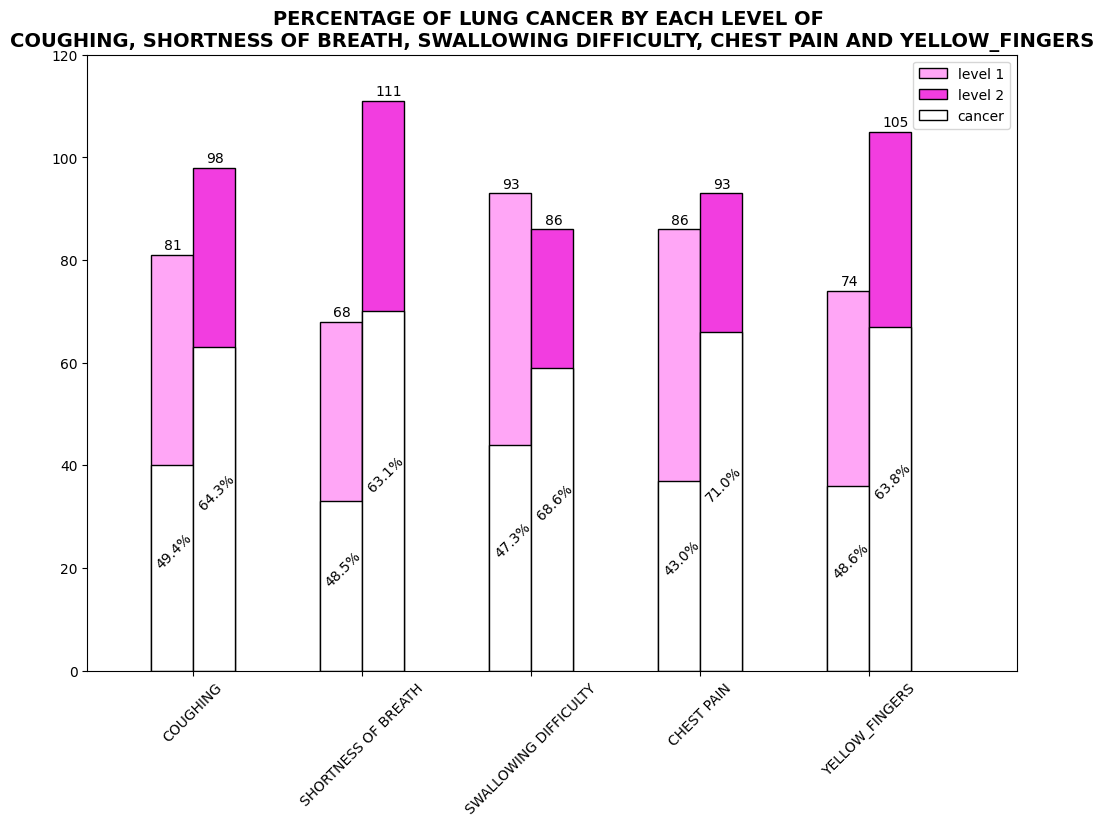

In [47]:
labels = ['COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'YELLOW_FINGERS']
width = 0.25
index = np.arange(len(labels))

total1 = data1[labels[0]].value_counts().sort_index()
cancer1 = data1[data1['LUNG_CANCER']==1].groupby(labels[0])['LUNG_CANCER'].count()
pct1 = cancer1/total1

total2 = data1[labels[1]].value_counts().sort_index()
cancer2 = data1[data1['LUNG_CANCER']==1].groupby(labels[1])['LUNG_CANCER'].count()
pct2 = cancer2/total2

total3 = data1[labels[2]].value_counts().sort_index()
cancer3 = data1[data1['LUNG_CANCER']==1].groupby(labels[2])['LUNG_CANCER'].count()
pct3 = cancer3/total3

total4 = data1[labels[3]].value_counts().sort_index()
cancer4 = data1[data1['LUNG_CANCER']==1].groupby(labels[3])['LUNG_CANCER'].count()
pct4 = cancer4/total4

total5 = data1[labels[4]].value_counts().sort_index()
cancer5 = data1[data1['LUNG_CANCER']==1].groupby(labels[4])['LUNG_CANCER'].count()
pct5 = cancer5/total5

kind1_tol = list(map(lambda x : x[1], [total1, total2, total3, total4, total5]))
kind1_can = list(map(lambda x : x[1], [cancer1, cancer2, cancer3, cancer4, cancer5]))
kind2_tol = list(map(lambda x : x[2], [total1, total2, total3, total4, total5]))
kind2_can = list(map(lambda x : x[2], [cancer1, cancer2, cancer3, cancer4, cancer5]))

plt.figure(figsize=(12,8))
tol1_bars = plt.bar(index, kind1_tol, width=width,color=rgb_to_heximal(255, 166, 246), label='level 1',
        edgecolor='black')
tol2_bars = plt.bar(index+width, kind2_tol, width=width,color=rgb_to_heximal(242, 61, 224), label='level 2',
        edgecolor='black')
can1_bars = plt.bar(index, kind1_can, width=width,color=rgb_to_heximal(255, 255, 255), label='cancer',edgecolor='black',
alpha=1)
can2_bars = plt.bar(index+width, kind2_can, width=width,color=rgb_to_heximal(255, 255, 255),edgecolor='black',
alpha=1)


for i, j, text in zip(index, list(can1_bars), map(lambda x: x[1], [pct1,pct2,pct3,pct4,pct5])):
    plt.text(i-width/2+0.02, j.get_height()/2, f'{round(text*100,1)}%', rotation=45)

for i, j, text in zip(index, list(can2_bars), map(lambda x: x[2], [pct1,pct2,pct3,pct4,pct5])):
    plt.text(i+width/2+0.02, j.get_height()/2, f'{round(text*100,1)}%', rotation=45)

for i, j in zip(index, tol1_bars):
    plt.text(i-width/2+0.08, j.get_height()+1, f'{j.get_height()}')

for i, j in zip(index, tol2_bars):
    plt.text(i+width/2+0.08, j.get_height()+1, f'{j.get_height()}')


plt.title('PERCENTAGE OF LUNG CANCER BY EACH LEVEL OF \n{}, {}, {}, {} AND {}'.format(labels[0],
            labels[1],labels[2],labels[3],labels[4]),
          fontsize=14, fontweight='bold')
plt.xlim(-.5, index[-1] + 1)
plt.ylim(0,120)
plt.xticks(index+width/2, labels, rotation=45)
plt.legend()
plt.show()
